# Microcredencial: Python aplicado a gestión de carteras

# Prueba 1

## Normativa del examen

**OBSERVACION GLOBAL**

En caso de proponer alguna cartera, recuerda filtrar los pesos para eliminar aquellos que estén por debajo de $10^{-4}$.

En el proceso de optimización con CVXPY no se permiten posiciones cortas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp
import yfinance as yf

---

## Ejercicio 1 [4 puntos]

El Sr. Pikachu ha recibido una recomendación de cartera por parte del profesor Oak, la cual se encuentra registrada en el archivo `datos_prueba1.csv`. Sin embargo, el Sr. Pikachu te ha pedido una segunda opinión como experto en gestión de carteras. Si el profesor Oak ha estimado correctamente el riesgo que Pikachu está dispuesto a asumir, ¿confirmarías que es la cartera adecuada? Si no es el caso, proporciona los pesos, la rentabilidad y la volatilidad de tu propuesta.

In [2]:
file_path = 'https://raw.githubusercontent.com/alfonso-santos/microcredencial-carteras-python-2023/main/datos_practicas/datos_prueba1.csv'

In [3]:
datos_df = pd.read_csv(file_path, index_col=0)
datos_df.head()


,Tickers,Pesos
0,COP,0.017518
1,DRI,0.019341
2,SNPS,0.018392
3,CL,0.017118
4,HAS,0.025742


In [4]:
tickers = list(datos_df['Tickers'])
pesos_cartera = np.array(datos_df['Pesos'])
start_date = '2020-01-01'

In [5]:
precios = yf.download(tickers,
                      start=start_date)['Adj Close']
precios.head()

[*********************100%%**********************]  20 of 20 completed


Ticker,APA,CBOE,CL,CMS,COP,DG,DRI,EXPE,F,HAS,HCA,HSY,KLAC,MAS,MDT,SNPS,VFC,WM,WST,XOM
Date,,,,,,,,,,,,,,,,,,,,
2020-01-02,23.632689,112.306107,61.546371,54.405338,55.509178,149.984085,100.416939,110.569191,7.864790,89.668938,142.326996,132.027100,172.514542,44.931297,101.951073,142.869995,85.763031,106.264542,150.167023,56.999115
2020-01-03,23.940210,114.006836,61.456036,54.934311,55.712696,148.882263,100.524292,108.726028,7.689461,89.430573,142.761261,133.219299,169.216782,44.586887,101.345917,141.759995,85.223976,107.297226,150.562866,56.540867
2020-01-06,23.893608,112.935677,61.880665,55.181175,56.374130,148.373383,101.186234,108.337479,7.647715,89.694489,143.301605,132.586502,165.408752,44.242477,102.244751,141.979996,84.890251,107.855431,150.642059,56.974998
2020-01-07,30.295685,111.084557,61.031384,54.899052,56.374130,146.136368,100.318558,109.612740,7.722856,88.017387,143.108627,132.843323,166.722183,43.823601,101.888786,142.960007,84.470978,107.929863,150.256073,56.508694
2020-01-08,30.500702,109.947594,62.585400,54.881416,55.068226,145.502701,101.839195,108.217926,7.722856,89.345436,144.054291,133.934647,166.939514,44.177326,103.677544,145.860001,83.033463,107.994980,148.227341,55.656532


In [6]:
precios.shape

(1062, 20)

In [7]:
retornos = np.log(precios).diff().dropna()
retornos.head()

Ticker,APA,CBOE,CL,CMS,COP,DG,DRI,EXPE,F,HAS,HCA,HSY,KLAC,MAS,MDT,SNPS,VFC,WM,WST,XOM
Date,,,,,,,,,,,,,,,,,,,,
2020-01-03,0.012929,0.015030,-0.001469,0.009676,0.003660,-0.007373,0.001069,-0.016810,-0.022545,-0.002662,0.003047,0.008989,-0.019301,-0.007695,-0.005953,-0.007800,-0.006305,0.009671,0.002633,-0.008072
2020-01-06,-0.001949,-0.009440,0.006886,0.004484,0.011802,-0.003424,0.006563,-0.003580,-0.005444,0.002947,0.003778,-0.004761,-0.022761,-0.007754,0.008830,0.001551,-0.003924,0.005189,0.000526,0.007649
2020-01-07,0.237394,-0.016527,-0.013820,-0.005126,0.000000,-0.015192,-0.008612,0.011702,0.009777,-0.018875,-0.001348,0.001935,0.007909,-0.009513,-0.003488,0.006879,-0.004951,0.000690,-0.002566,-0.008218
2020-01-08,0.006744,-0.010288,0.025144,-0.000321,-0.023437,-0.004346,0.015044,-0.012807,0.000000,0.014976,0.006586,0.008182,0.001303,0.008039,0.017404,0.020082,-0.017164,0.000603,-0.013594,-0.015195
2020-01-09,-0.003980,-0.008583,0.008481,0.007681,0.017251,0.006773,0.012491,0.010441,0.001081,-0.010055,-0.012538,0.003623,-0.006701,0.002005,0.016093,0.019082,-0.013069,0.000431,0.011154,0.007627


In [8]:
retornos.shape

(1061, 20)

In [9]:
retornos_cartera = retornos @ pesos_cartera
rentabilidad_cartera = retornos_cartera.mean()
riesgo_cartera = retornos_cartera.std()
print(rentabilidad_cartera * 252, riesgo_cartera * np.sqrt(252))

0.24972959981918352 0.3116877495875152


In [10]:
num_activos = len(retornos.columns)
num_activos

20

In [11]:
retornos_esperados = retornos.mean().to_numpy()
matriz_cov = retornos.cov().to_numpy()

In [12]:
pesos = cp.Variable(num_activos)

rentabilidad = retornos_esperados @ pesos
riesgo = cp.quad_form(pesos, matriz_cov)

restricciones = [cp.sum(pesos) == 1,
                 pesos >= 0]

objetivo = cp.Minimize(riesgo)

problema = cp.Problem(objetivo, restricciones)

resultado = problema.solve('ECOS')

In [13]:
pesos_min_riesgo = pesos.value
pesos_min_riesgo[pesos_min_riesgo <= 1e-4] = 0

In [14]:
retornos_cartera = retornos @ pesos_min_riesgo
rentabilidad_min_riesgo = retornos_cartera.mean()
riesgo_min_riesgo = retornos_cartera.std()

In [15]:
imax = np.argmax(retornos.mean())
max_riesgo = np.sqrt(matriz_cov[imax, imax])
riesgos = np.linspace(riesgo_min_riesgo, max_riesgo, 200)
rentabilidades = []
for risk in riesgos:
    pesos = cp.Variable(num_activos)

    rent = retornos_esperados @ pesos
    riesgo = cp.quad_form(pesos, matriz_cov)
    
    restricciones = [cp.sum(pesos) == 1,
                     pesos >= 0,
                     riesgo <= risk**2]

    objetivo = cp.Maximize(rent)

    problema = cp.Problem(objetivo, restricciones)

    resultado = problema.solve("ECOS")
    
    pesos = pesos.value
    retornos_cartera = retornos @ pesos
    rent = retornos_cartera.mean()
    rentabilidades.append(rent)
rentabilidades = np.array(rentabilidades)

c:\Users\danto\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


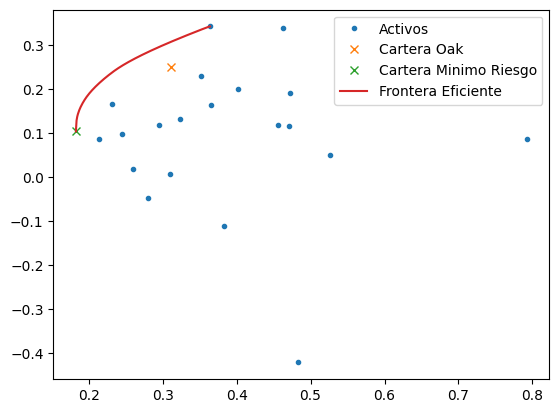

In [16]:
plt.plot(retornos.std() * np.sqrt(252), retornos.mean() * 252, '.', label='Activos')
plt.plot(riesgo_cartera * np.sqrt(252), rentabilidad_cartera * 252, 'x', label='Cartera Oak')
plt.plot(riesgo_min_riesgo * np.sqrt(252), rentabilidad_min_riesgo * 252, 'x', label='Cartera Minimo Riesgo')
plt.plot(riesgos * np.sqrt(252), rentabilidades * 252, '-', label='Frontera Eficiente')

plt.legend()

In [17]:
riesgo_objetivo = riesgo_cartera

pesos = cp.Variable(num_activos)

rentabilidad = retornos_esperados @ pesos
riesgo = cp.quad_form(pesos, matriz_cov)

restricciones = [cp.sum(pesos) == 1,
                 pesos >= 0,
                 riesgo <= riesgo_objetivo**2]

objetivo = cp.Maximize(rentabilidad)

problema = cp.Problem(objetivo, restricciones)

resultado = problema.solve('ECOS')


In [18]:
pesos_objetivo = pesos.value
pesos_objetivo[pesos_objetivo <= 1e-4] = 0
pesos_objetivo

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04388705, 0.        , 0.        ,
       0.74462944, 0.        , 0.13435665, 0.04789814, 0.02922499])

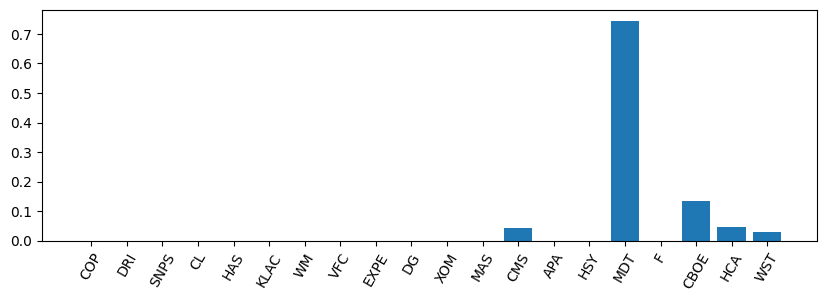

In [19]:
plt.figure(figsize=(10, 3))
plt.bar(range(num_activos), pesos_objetivo)
plt.xticks(range(num_activos), tickers, rotation=60)
plt.show()

In [20]:
retornos_cartera_recomendada = retornos @ pesos_objetivo
rentabilidad_cartera_recomendada = retornos_cartera_recomendada.mean()
riesgo_cartera_recomendada = retornos_cartera_recomendada.std()

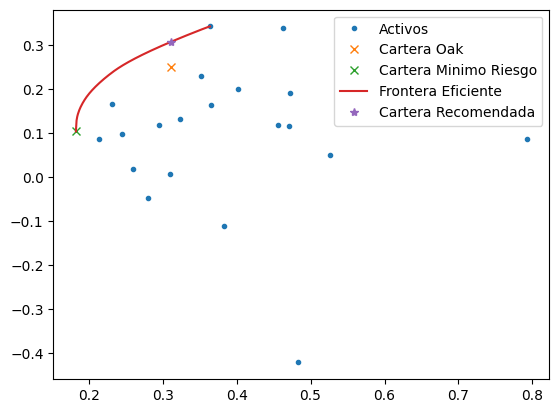

In [21]:
plt.plot(retornos.std() * np.sqrt(252), retornos.mean() * 252, '.', label='Activos')
plt.plot(riesgo_cartera * np.sqrt(252), rentabilidad_cartera * 252, 'x', label='Cartera Oak')
plt.plot(riesgo_min_riesgo * np.sqrt(252), rentabilidad_min_riesgo * 252, 'x', label='Cartera Minimo Riesgo')
plt.plot(riesgos * np.sqrt(252), rentabilidades * 252, '-', label='Frontera Eficiente')
plt.plot(riesgo_cartera_recomendada * np.sqrt(252), rentabilidad_cartera_recomendada * 252, '*', label='Cartera Recomendada')

plt.legend()

Dibujando la frontera eficiente podemos observar si la cartera de Oak está en ella (no he conseguido hacerlo). Asumiendo que no lo estaba he calculado la cartera con maxima rentabilidad para el mismo riesgo que la cartera de Oak y podemos ver que la hay. Invirtiendo tanto por ciento en cada activo, como está representado en el gráfico de barras.

## Ejercicio 2 [4 puntos]

Continuando con el caso del Sr. Pikachu, si al universo de activos incluímos un activo libre de riesgo con una rentabilidad anual del 1%, ¿cambiarías tu decisión? Si la respuesta es afirmativa, proporciona los pesos, la rentabilidad y la volatilidad de tu propuesta.

In [22]:
rf = 0.01/252

x = cp.Variable(num_activos)
pesos = x / cp.sum(x)

pi = retornos_esperados - rf

riesgo = cp.quad_form(x, matriz_cov)

restricciones = [pi @ x == 1,
                 x >= 0]

objetivo = cp.Minimize(riesgo)

problema = cp.Problem(objetivo, restricciones)

resultado = problema.solve('ECOS')


c:\Users\danto\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [23]:
pesos_sharpe = pesos.value
pesos_sharpe[pesos_sharpe <= 1e-4] = 0
pesos_sharpe

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.47977479, 0.        , 0.33874485, 0.09722571, 0.08425086])

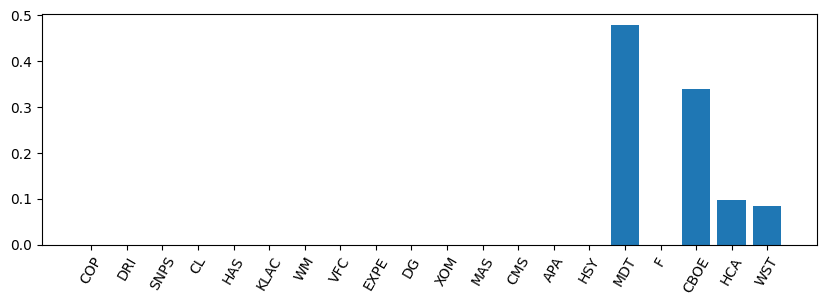

In [24]:
plt.figure(figsize=(10, 3))
plt.bar(range(num_activos), pesos_sharpe)
plt.xticks(range(num_activos), tickers, rotation=60)
plt.show()

In [25]:
retornos_sharpe = retornos @ pesos_sharpe
rentabilidad_sharpe = retornos_sharpe.mean()
riesgo_sharpe = retornos_sharpe.std()

In [26]:
w = 1 - riesgo_objetivo / riesgo_sharpe
rentabilidad_objetivo = w * rf + (1 - w) * rentabilidad_sharpe

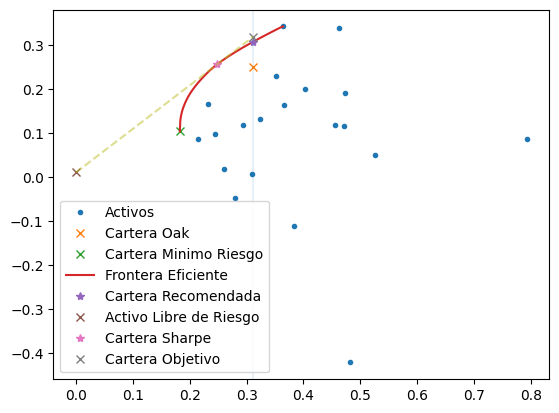

In [27]:
plt.plot(retornos.std() * np.sqrt(252), retornos.mean() * 252, '.', label='Activos')
plt.plot(riesgo_cartera * np.sqrt(252), rentabilidad_cartera * 252, 'x', label='Cartera Oak')
plt.plot(riesgo_min_riesgo * np.sqrt(252), rentabilidad_min_riesgo * 252, 'x', label='Cartera Minimo Riesgo')
plt.plot(riesgos * np.sqrt(252), rentabilidades * 252, '-', label='Frontera Eficiente')
plt.plot(riesgo_cartera_recomendada * np.sqrt(252), rentabilidad_cartera_recomendada * 252, '*', label='Cartera Recomendada')

plt.plot(0, rf * 252, 'x', label='Activo Libre de Riesgo')
plt.plot(riesgo_sharpe * np.sqrt(252), rentabilidad_sharpe * 252, '*', label='Cartera Sharpe')
plt.plot(riesgo_objetivo * np.sqrt(252), rentabilidad_objetivo * 252, 'x', label='Cartera Objetivo')
plt.plot([0, riesgo_objetivo*np.sqrt(252)], [rf*252, rentabilidad_objetivo*252], '--', alpha=0.5)
plt.axvline(riesgo_cartera * np.sqrt(252), alpha=0.1)

plt.legend()

La cartera formada con el activo libre de riesgo y la que maximiza el ratio de Sharpe tiene una rentabilidad mayor que la recomendada anteriormente para un mismo nivel de riesgo, por lo que la ideal sería esta última.

## Ejercicio 3 [2 puntos]

Redacta un folleto resumido en la que se le proporcione al Sr. Pikachu información sobre la cartera propuesta.

In [28]:
print(f'En conclusión, la mejor cartera para un riesgo de {round(riesgo_objetivo * np.sqrt(252) * 100,2)}% se consigue apalancándote un {-round(w * 100,2)}% del dinero en el activo libre de riesgo e invirtiendo {round((1-w)*100,2)}% en la cartera que maximiza el ratio de Sharpe. Da una rentabilidad del {round(rentabilidad_objetivo * 252 * 100,2)}%.')

En conclusión, la mejor cartera para un riesgo de 31.17% se consigue apalancándote un 25.46% del dinero en el activo libre de riesgo e invirtiendo 125.46% en la cartera que maximiza el ratio de Sharpe. Da una rentabilidad del 31.84%.


In [32]:
def imprimir_con_saltos(texto, longitud_linea):
    for i in range(0, len(texto), longitud_linea):
        print(texto[i:i+longitud_linea])

texto_largo = f'En conclusión, la mejor cartera para un riesgo de {round(riesgo_objetivo * np.sqrt(252) * 100,2)}% se consigue apalancándote un {-round(w * 100,2)}% del dinero en el activo libre de riesgo e invirtiendo {round((1-w)*100,2)}% en la cartera que maximiza el ratio de Sharpe. Da una rentabilidad del {round(rentabilidad_objetivo * 252 * 100,2)}%.'
imprimir_con_saltos(texto_largo, 101)

En conclusión, la mejor cartera para un riesgo de 31.17% se consigue apalancándote un 25.46% del dine
ro en el activo libre de riesgo e invirtiendo 125.46% en la cartera que maximiza el ratio de Sharpe. 
Da una rentabilidad del 31.84%.
